In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# Load the CSV file
df = pd.read_csv('city_day.csv')

# Preview the data
df.head()


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [7]:
# Keep only selected cities
cities = ['Delhi', 'Bengaluru', 'Kolkata', 'Hyderabad', 'Jaipur', 'Chennai', 'Visakhapatnam']
df = df[df['City'].isin(cities)]

# Check how many rows per city
df['City'].value_counts()


,count
City,
Bengaluru,2009
Chennai,2009
Delhi,2009
Hyderabad,2006
Visakhapatnam,1462
Jaipur,1114
Kolkata,814


In [8]:
# Drop rows where AQI is null
df = df[df['AQI'].notna()]

# Confirm null AQI values are removed
df['AQI'].isnull().sum()


np.int64(0)

In [9]:
# Drop 'Xylene', 'AQI_Bucket', and 'Date'
df.drop(['Xylene', 'AQI_Bucket', 'Date'], axis=1, inplace=True)

# Show remaining columns
df.columns


Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'AQI'],
      dtype='object')

In [10]:
# Fill remaining missing numeric values with median
df = df.fillna(df.median(numeric_only=True))

# Confirm no nulls left
df.isnull().sum().sum()


np.int64(0)

In [11]:
# Save the cleaned dataset to a new CSV file
df.to_csv('cleaned_aqi_selected_cities.csv', index=False)

# Confirmation message
print("Cleaned data saved as 'cleaned_aqi_selected_cities.csv'")


Cleaned data saved as 'cleaned_aqi_selected_cities.csv'


/tmp/ipython-input-12-1449115968.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='City', y='AQI', data=df, palette='Set3')


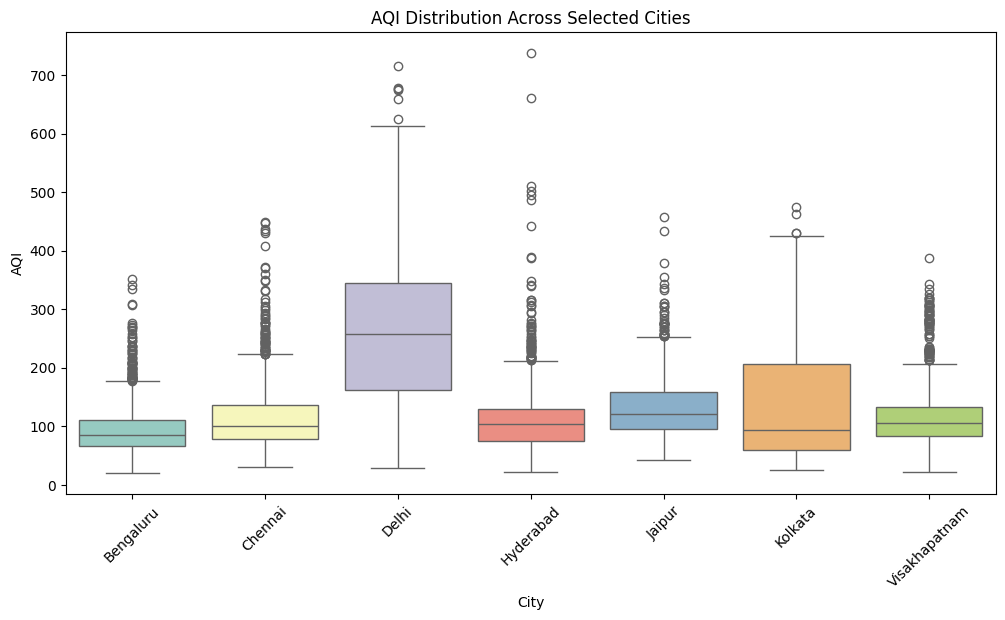

In [12]:
# Boxplot of AQI by City
plt.figure(figsize=(12, 6))
sns.boxplot(x='City', y='AQI', data=df, palette='Set3')
plt.title("AQI Distribution Across Selected Cities")
plt.xticks(rotation=45)
plt.show()


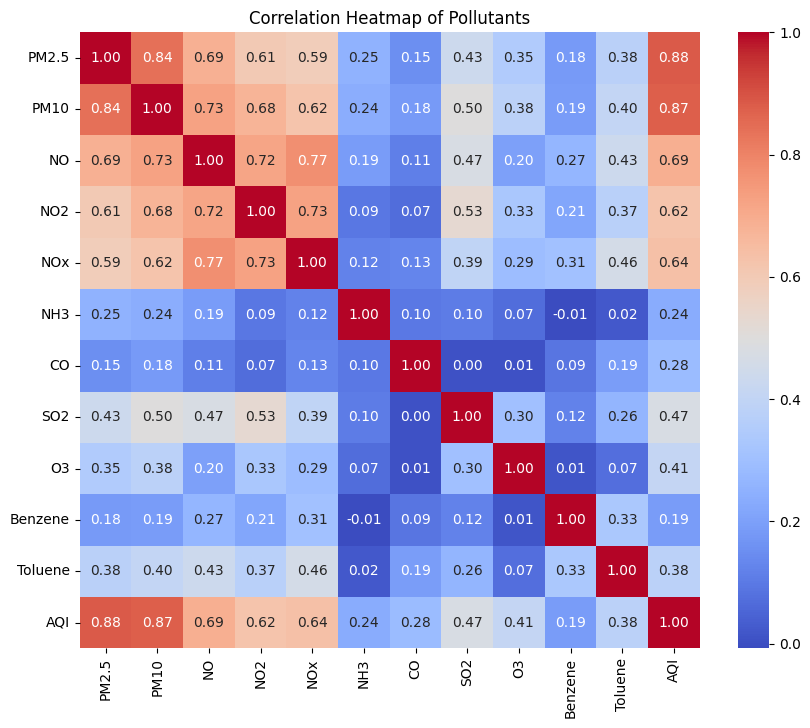

In [13]:
# Correlation Heatmap for all numeric features
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Pollutants")
plt.show()


/tmp/ipython-input-14-2220332574.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='City', y='AQI', data=df, estimator=np.mean, ci=None, palette='viridis')
/tmp/ipython-input-14-2220332574.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='AQI', data=df, estimator=np.mean, ci=None, palette='viridis')


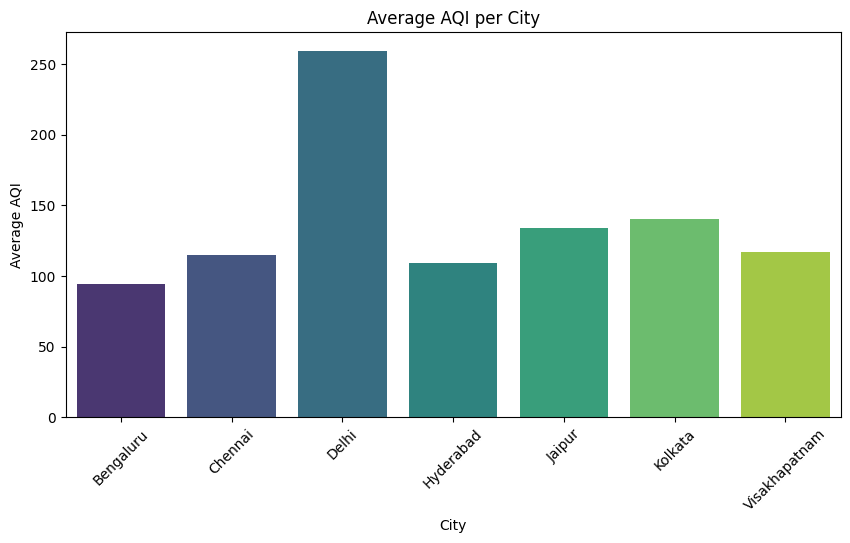

In [14]:
# Barplot of Mean AQI per City
plt.figure(figsize=(10, 5))
sns.barplot(x='City', y='AQI', data=df, estimator=np.mean, ci=None, palette='viridis')
plt.title("Average AQI per City")
plt.xticks(rotation=45)
plt.ylabel("Average AQI")
plt.show()
